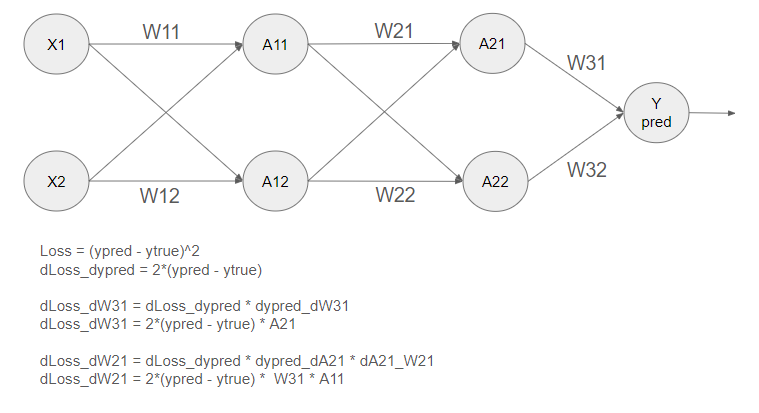

In [1]:
import numpy as np

# Initialize the weights randomly
np.random.seed(41)  # For reproducibility
W1 = np.random.rand(2, 2)
W2 = np.random.rand(2, 2)
W3 = np.random.rand(1, 2)

# Define the input and true output
x = np.array([1, 2])  # Example input
y_true = np.array([6])  # True output for our example

# Learning rate
alpha = 0.01
print("W1: \n", W1, "\n\nW2:\n", W2, "\n\nW3:\n", W3, "\n")
# Forward propagation
def forward_propagation(x, W1, W2, W3):
    z1 = np.dot(W1, x)
    a1 = z1  # Linear activation for hidden layer 1
    z2 = np.dot(W2, a1)
    a2 = z2  # Linear activation for hidden layer 2
    z3 = np.dot(W3, a2)
    y_pred = z3  # Linear activation for output layer
    return y_pred, a1, a2

def backward_propagation(x, y_true, y_pred, a1, a2, W1, W2, W3):
    dLoss_dy_pred = 2 * (y_pred - y_true)
    dLoss_dW3 = dLoss_dy_pred * a2
    
    dLoss_da2 = np.dot(W3.T, dLoss_dy_pred)
    dLoss_dW2 = np.outer(dLoss_da2, a1)
    
    dLoss_da1 = np.dot(W2.T, dLoss_da2)
    dLoss_dW1 = np.outer(dLoss_da1, x)
    
    return dLoss_dW1, dLoss_dW2, dLoss_dW3


# Training loop
print("Training started")
for epoch in range(1000):  # Number of epochs
    
    y_pred, a1, a2 = forward_propagation(x, W1, W2, W3)
    dLoss_dW1, dLoss_dW2, dLoss_dW3 = backward_propagation(x, y_true, y_pred, a1, a2, W1, W2, W3)

    # Update weights
    W1 -= alpha * dLoss_dW1
    W2 -= alpha * dLoss_dW2
    W3 -= alpha * dLoss_dW3

    # Compute loss
    loss = np.mean((y_pred - y_true)**2)
    
    print(f'\tEpoch {epoch}, Actual: {y_true}, Pred: {y_pred}, Loss: {np.round(loss, 5)}')
    
    if loss >= 0 and loss <=0.000001:
        print("Training Finished")
        print("\n\nAfter optimization, the new weights are:")
        print("W1: \n", W1, "\n\nW2:\n", W2, "\n\nW3:\n", W3, "\n")
        break

# Final predicted value after training
print(f'Final predicted value: {y_pred}')

W1: 
 [[0.25092362 0.04609582]
 [0.67681624 0.04346949]] 

W2:
 [[0.1164237  0.60386569]
 [0.19093066 0.66851572]] 

W3:
 [[0.91744785 0.41878009]] 

Training started
	Epoch 0, Actual: [6], Pred: [0.70103764], Loss: 28.079
	Epoch 1, Actual: [6], Pred: [1.30789269], Loss: 22.01587
	Epoch 2, Actual: [6], Pred: [2.29010584], Loss: 13.76331
	Epoch 3, Actual: [6], Pred: [3.76418893], Loss: 4.99885
	Epoch 4, Actual: [6], Pred: [5.34191604], Loss: 0.43307
	Epoch 5, Actual: [6], Pred: [6.01607614], Loss: 0.00026
	Epoch 6, Actual: [6], Pred: [5.99761111], Loss: 1e-05
	Epoch 7, Actual: [6], Pred: [6.00034716], Loss: 0.0
Training Finished


After optimization, the new weights are:
W1: 
 [[0.34458214 0.23341285]
 [1.04980206 0.78944112]] 

W2:
 [[0.2812649  1.06995416]
 [0.27745245 0.91577233]] 

W3:
 [[1.28993598 0.78921112]] 

Final predicted value: [6.00034716]


In [2]:
# To understand the details of each array, refer to below code:

In [3]:
# Initialize the weights randomly
np.random.seed(41)  # For reproducibility
W1 = np.random.rand(2, 2)
W2 = np.random.rand(2, 2)
W3 = np.random.rand(1, 2)

# Define the input and true output
x = np.array([1, 2])  # Example input
y_true = np.array([6])  # True output for our example

# Learning rate
alpha = 0.01

# Backward propagation
def backward_propagation_detailed(x, y_true, y_pred, a1, a2, W1, W2, W3):
    dLoss_dy_pred = 2 * (y_pred - y_true)
    
    print("\ndLoss_dy_pred\n", dLoss_dy_pred)
    
    dLoss_dW3 = dLoss_dy_pred * a2
    print("\nA2\n", a2)
    print("\ndLoss_dW3\n", dLoss_dW3)

    dLoss_da2 = np.dot(W3.T, dLoss_dy_pred)
    print("\nW3.T\n", W3.T)
    print("\ndLoss_da2\n", dLoss_da2)
    
    dLoss_dW2 = np.outer(dLoss_da2, a1)
    print("\nA1\n", a1)
    print("\ndLoss_dW2\n", dLoss_dW2)

    dLoss_da1 = np.dot(W2.T, dLoss_da2)
    print("\nW2.T\n", W2.T)
    print("\ndLoss_da1\n", dLoss_da1)
    
    dLoss_dW1 = np.outer(dLoss_da1, x)
    print("\nx\n", x)
    print("\ndLoss_dW1\n", dLoss_dW1)
    
    return dLoss_dW1, dLoss_dW2, dLoss_dW3


# Training loop
print("Training started")
for epoch in range(1000):  # Number of epochs
    print("---------------------------------------------------------------------")
    y_pred, a1, a2 = forward_propagation(x, W1, W2, W3)
    dLoss_dW1, dLoss_dW2, dLoss_dW3 = backward_propagation_detailed(x, y_true, y_pred, a1, a2, W1, W2, W3)

    # Update weights
    W1 -= alpha * dLoss_dW1
    W2 -= alpha * dLoss_dW2
    W3 -= alpha * dLoss_dW3

    # Compute loss
    loss = np.mean((y_pred - y_true)**2)
    
    print(f'\tEpoch {epoch}, Actual: {y_true}, Pred: {y_pred}, Loss: {np.round(loss, 5)}')
    
    if loss >= 0 and loss <=0.000001:
        print("Training Finished")
        print("\n\nAfter optimization, the new weights are:")
        print("W1: \n", W1, "\n\nW2:\n", W2, "\n\nW3:\n", W3, "\n")
        break

# Final predicted value after training
print(f'Final predicted value: {y_pred}')

Training started
---------------------------------------------------------------------

dLoss_dy_pred
 [-10.59792472]

A2
 [0.50115232 0.57609359]

dLoss_dW3
 [-5.31117453 -6.10539649]

W3.T
 [[0.91744785]
 [0.41878009]]

dLoss_da2
 [-9.72304324 -4.43819984]

A1
 [0.34311527 0.76375521]

dLoss_dW2
 [[-3.33612456 -7.42602495]
 [-1.52281411 -3.38969826]]

W2.T
 [[0.1164237  0.19093066]
 [0.60386569 0.66851572]]

dLoss_da1
 [-1.97938114 -8.83841855]

x
 [1 2]

dLoss_dW1
 [[ -1.97938114  -3.95876227]
 [ -8.83841855 -17.6768371 ]]
	Epoch 0, Actual: [6], Pred: [0.70103764], Loss: 28.079
---------------------------------------------------------------------

dLoss_dy_pred
 [-9.38421462]

A2
 [0.88381784 0.93802181]

dLoss_dW3
 [-8.29393631 -8.80259796]

W3.T
 [[0.97055959]
 [0.47983405]]

dLoss_da2
 [-9.10793953 -4.50286572]

A1
 [0.44208432 1.20567614]

dLoss_dW2
 [[ -4.02647727 -10.98122538]
 [ -1.99064634  -5.42899776]]

W2.T
 [[0.14978495 0.2061588 ]
 [0.67812594 0.7024127 ]]

dLoss_da1
 [